# Capstone Project - Streetlamps and Vehicle Collisions

### Applied Data Science Capstone by IBM/Coursera

## Table of Contents

## Introduction: Business Problem

In this project, we will try to find optimal locations where convex mirrors can be placed. This report will be targeted to government officials interested in reducing collisions that are due to low visibility from inability to spot a car from an angle at night. 

We will generate a few promising areas where convex mirrors can be placed so that the government officials can allocate resources to install them. 

## Data

Based on the definition of our problem, the factors that will influence our decisions are:

- Type of Collision
- Light condition
- Junction Type

Following data sources will be needed to extract and generate the required information

- coordinates of areas of collisions where collisions are frequent


In [1]:
import pandas as pd
import numpy as np

In [2]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
df = dataframe.drop(
    ['SEVERITYCODE', 
     'INCKEY', 
     'COLDETKEY', 
     'REPORTNO',
     'STATUS',
     'ADDRTYPE',
     'INTKEY',
     'LOCATION',
     'EXCEPTRSNCODE',
     'WEATHER',
     'EXCEPTRSNDESC',
     'SEVERITYCODE',
     'SEVERITYCODE.1',
     'SEVERITYDESC',
     'PERSONCOUNT',
     'PEDCOUNT',
     'PEDCYLCOUNT',
     'VEHCOUNT',
     'INCDTTM',
     'SDOT_COLCODE',
     'SDOT_COLDESC',
     'INATTENTIONIND',
     'UNDERINFL',
     'ROADCOND',
     'PEDROWNOTGRNT',
     'SDOTCOLNUM',
     'SPEEDING',
     'ST_COLCODE',
     'ST_COLDESC',
     'SEGLANEKEY',
     'CROSSWALKKEY',
     'HITPARKEDCAR'], 
    axis=1)

In [4]:
lightcond=df['LIGHTCOND']
unique_lightcond=set(lightcond)
collision_type=df['COLLISIONTYPE']
unique_collision_type = set(collision_type)
junctype=df['JUNCTIONTYPE']
unique_junctype=set(junctype)

In [5]:
unique_lightcond

{'Dark - No Street Lights',
 'Dark - Street Lights Off',
 'Dark - Street Lights On',
 'Dark - Unknown Lighting',
 'Dawn',
 'Daylight',
 'Dusk',
 'Other',
 'Unknown',
 nan}

In [6]:
unique_collision_type

{'Angles',
 'Cycles',
 'Head On',
 'Left Turn',
 'Other',
 'Parked Car',
 'Pedestrian',
 'Rear Ended',
 'Right Turn',
 'Sideswipe',
 nan}

In [7]:
unique_junctype

{'At Intersection (but not related to intersection)',
 'At Intersection (intersection related)',
 'Driveway Junction',
 'Mid-Block (but intersection related)',
 'Mid-Block (not related to intersection)',
 'Ramp Junction',
 'Unknown',
 nan}

In [8]:
df.dropna(inplace = True) 

In [9]:
df.LIGHTCOND.str.contains(r'Dark').sum()

49312

In [10]:
df.LIGHTCOND.str.contains(r'Dawn' or r'Daylight' or r'Dusk').sum()

2389

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Presence_of_Light = ['Dark', 'Light']
Number_of_Accidents = [49871, 2422]
ax.bar(Presence_of_Light, Number_of_Accidents)
plt.show()

<Figure size 640x480 with 1 Axes>

Determined that accidents due to lack of street lights are relatively small. So, we will determine what kind of collisions are greatest at night.

In [12]:
dark = df[df['LIGHTCOND'].str.contains('Dark')]
angles=dark.COLLISIONTYPE.str.match('Angles').sum()
print('Angles:', angles)
cycles=dark.COLLISIONTYPE.str.match('Cycles').sum()
print('Cycles:', cycles)
headon=dark.COLLISIONTYPE.str.match('Head On').sum()
print('Head on:', headon)
parkedcar=dark.COLLISIONTYPE.str.match('Parked Car').sum()
print('Parked car:', parkedcar)
leftturn=dark.COLLISIONTYPE.str.match('Left Turn').sum()
print('Left Turn:', leftturn)
pedestrian=dark.COLLISIONTYPE.str.match('Pedestrian').sum()
print('Pedestrian:', pedestrian)
rearended=dark.COLLISIONTYPE.str.match('Rear Ended').sum()
print('Rear Ended:', rearended)
rightturn=dark.COLLISIONTYPE.str.match('Right Turn').sum()
print('Right Turn:', rightturn)
sideswipe=dark.COLLISIONTYPE.str.match('Sideswipe').sum()
print('Sideswipe:', sideswipe)

Angles: 8069
Cycles: 958
Head on: 640
Parked car: 13388
Left Turn: 3776
Pedestrian: 2195
Rear Ended: 7183
Right Turn: 606
Sideswipe: 3969


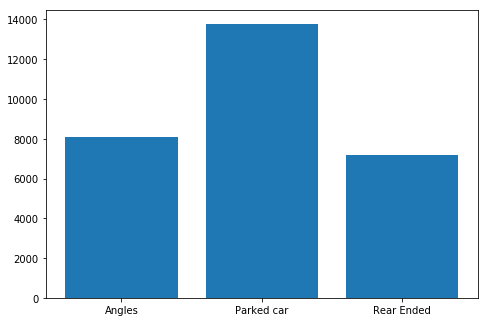

In [13]:
fig1 = plt.figure()
ax1 = fig1.add_axes([0,0,1,1])
Collision_Type = [
    'Angles', 
    'Parked car',
    'Rear Ended']
Number_of_Accidents1 = [8078,13797,7193]
ax1.bar(Collision_Type, Number_of_Accidents1)
plt.show()

In [14]:
inter_notinter=dark.JUNCTIONTYPE.str.match('At Intersection (but not related to intersection)').sum()
print('At Intersection (but not related to intersection):', inter_notinter)

inter_related = inter=dark.JUNCTIONTYPE.str.match('At Intersection (intersection related)').sum()
print('At Intersection (intersection related):', inter_related)

driveway=dark.JUNCTIONTYPE.str.match('Driveway Junction').sum()
print('Driveway Junction:', driveway)

midblock_inter=dark.JUNCTIONTYPE.str.match('Mid-Block (but intersection related)').sum()
print('Mid-Block (but intersection related:', midblock_inter)

midblock_notinter=dark.JUNCTIONTYPE.str.match('Mid-Block (not related to intersection)').sum()
print('Mid-Block (not related to intersection)', midblock_notinter)

ramp_junction=dark.JUNCTIONTYPE.str.match('Ramp Junction').sum()
print('Ramp Junction', ramp_junction)


At Intersection (but not related to intersection): 0
At Intersection (intersection related): 0
Driveway Junction: 2051
Mid-Block (but intersection related: 0
Mid-Block (not related to intersection) 0
Ramp Junction 39


## Methodology

In this project, we will direct our efforts on detecting areas that have high collision frequency. 

In the first step, we have collected the required data: location of areas where collision is high due to poor visibility from lack of convex mirrors. We moved our focus to the types of accidents that occur at night. We found that after accidents from parked cars, angle-related accidents occur the most frequently in 2009. We also focused on accidents at driveway junctions where most of such accidents happen. 

In the second step in our analysis, we will use heatmaps to identify areas that require installation of convex mirrors.

## Analysis

Our plot shows that when it is dark, the number of car accidents are due to parked cars, followed by angles. As such, we shall follow up on angles. Angles-related collisions could be reduced by installing convex mirrors.

In [15]:
dark.head()
dark.set_index('OBJECTID')

,X,Y,COLLISIONTYPE,INCDATE,JUNCTIONTYPE,LIGHTCOND
OBJECTID,,,,,,
2,-122.347294,47.647172,Sideswipe,2006/12/20 00:00:00+00,Mid-Block (not related to intersection),Dark - Street Lights On
16,-122.356273,47.571375,Rear Ended,2006/05/17 00:00:00+00,Mid-Block (not related to intersection),Dark - Street Lights On
17,-122.323966,47.606374,Parked Car,2005/12/22 00:00:00+00,Mid-Block (not related to intersection),Dark - No Street Lights
19,-122.317414,47.664028,Head On,2013/03/31 00:00:00+00,Mid-Block (not related to intersection),Dark - Street Lights On
26,-122.292403,47.732847,Rear Ended,2013/03/27 00:00:00+00,Mid-Block (not related to intersection),Dark - Street Lights On
29,-122.318169,47.615837,Parked Car,2008/07/18 00:00:00+00,Mid-Block (not related to intersection),Dark - Street Lights On
39,-122.324749,47.605555,Left Turn,2005/11/05 00:00:00+00,At Intersection (intersection related),Dark - Street Lights On
40,-122.320737,47.601700,Left Turn,2004/07/21 00:00:00+00,At Intersection (intersection related),Dark - Street Lights On
42,-122.277175,47.526784,Parked Car,2007/02/22 00:00:00+00,Mid-Block (not related to intersection),Dark - Street Lights On


In [16]:
dark_angl = dark[dark.COLLISIONTYPE.str.match('Angles')]
dark_angle = dark_angl[dark_angl.INCDATE.str.contains('2019')]
dark_angles = dark_angle[dark_angle.JUNCTIONTYPE.str.contains('Driveway Junction')]

In [17]:
dark_angles.set_index('OBJECTID')
coordinates = dark_angles.drop(['COLLISIONTYPE','LIGHTCOND'],axis=1)
coordinates.dropna
lng_1 = coordinates.X
lat_1 = coordinates.Y

In [18]:
!pip install folium==0.5.0
import folium

In [19]:
map = folium.Map(
    location=[47.6,-122.3],
    tiles='Stamen Toner',
    zoom_start=12
)

In [20]:
for i in range(0,len(coordinates)):
    map.add_child(folium.Marker([coordinates.iloc[i]['Y'], coordinates.iloc[i]['X']], )) 
       
display(map)

## Results and Discussion

Our bar graphs show that dark conditions, angles, and drive way junctions result in more accidents. Therefore, by locating where such accidents occur by using coordinates, we can identify where these latest accidents in 2019 occurred.

## Conclusion

The government should place convex mirrors at driveway junctions to reduce the number of nighttime angle-type collisions at these coordinates. It is also clear that nearer the city of Seattle, there are understandably more of such accidents, and thus making sure that there are enough resources to ensure safe travels is important. 